/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rammer3448/anaconda3/envs/fusion_project_1_1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


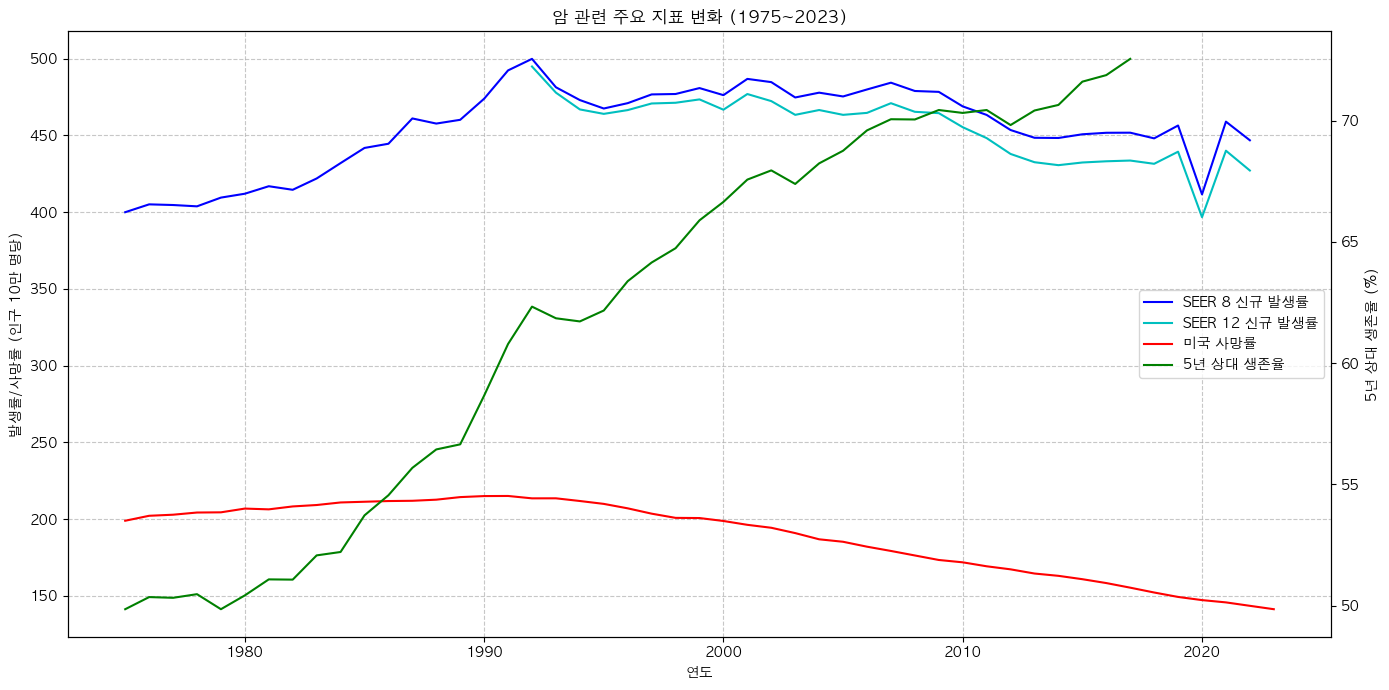

In [43]:
# 새로 시작: 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

# macOS 한글 폰트 설정 (AppleGothic)
plt.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 입력 (raw_data, columns는 이전과 동일하게 복사해서 사용)
raw_data = [
    [1975,400.02,400.40,None,None,199.02,201.08,49.85,49.95],
    [1976,405.13,402.67,None,None,202.25,202.02,50.35,50.26],
    [1977,404.70,404.95,None,None,202.95,202.97,50.32,50.58],
    [1978,403.84,407.25,None,None,204.37,203.92,50.47,50.89],
    [1979,409.53,409.56,None,None,204.50,204.87,49.85,51.21],
    [1980,412.06,411.88,None,None,206.94,205.83,50.42,51.52],
    [1981,416.94,414.21,None,None,206.44,206.80,51.08,51.83],
    [1982,414.62,416.56,None,None,208.34,207.77,51.07,52.14],
    [1983,421.98,423.71,None,None,209.26,208.74,52.07,52.45],
    [1984,432.00,430.98,None,None,210.93,209.72,52.21,52.75],
    [1985,441.88,438.37,None,None,211.39,210.70,53.72,53.85],
    [1986,444.61,445.90,None,None,211.85,211.69,54.55,54.93],
    [1987,461.10,453.55,None,None,212.02,212.68,55.68,55.99],
    [1988,457.76,461.33,None,None,212.74,213.67,56.44,57.05],
    [1989,460.21,469.25,None,None,214.42,214.68,56.65,58.08],
    [1990,473.95,477.31,None,None,215.09,215.68,58.66,59.10],
    [1991,492.40,485.50,None,None,215.16,216.69,60.79,60.11],
    [1992,499.91,493.83,494.93,493.23,213.61,214.59,62.33,60.80],
    [1993,481.41,486.62,477.90,481.26,213.63,212.52,61.85,61.48],
    [1994,473.07,479.51,466.97,469.57,211.88,210.46,61.72,62.15],
    [1995,467.57,472.50,464.08,469.34,210.00,208.42,62.17,62.81],
    [1996,471.06,473.31,466.54,469.11,207.10,206.41,63.38,63.47],
    [1997,476.75,474.12,470.85,468.87,203.63,204.41,64.15,64.12],
    [1998,477.02,474.92,471.31,468.64,200.89,202.43,64.74,64.76],
    [1999,480.88,475.74,473.50,468.41,200.78,200.47,65.89,65.39],
    [2000,476.28,476.55,466.79,468.18,198.86,198.53,66.65,66.01],
    [2001,486.86,477.36,477.00,467.94,196.36,196.61,67.57,66.63],
    [2002,484.76,478.17,472.39,467.71,194.44,193.70,67.95,67.23],
    [2003,474.76,478.99,463.44,467.48,190.97,190.84,67.39,67.60],
    [2004,477.89,479.81,466.58,467.25,186.93,188.01,68.24,67.97],
    [2005,475.42,480.63,463.44,467.02,185.32,185.23,68.76,68.33],
    [2006,479.97,481.45,464.72,466.78,182.12,182.49,69.60,68.69],
    [2007,484.39,482.27,471.03,466.55,179.34,179.79,70.06,69.05],
    [2008,478.98,483.09,465.42,466.32,176.40,177.12,70.05,69.40],
    [2009,478.41,476.09,464.56,466.09,173.46,174.50,70.44,69.75],
    [2010,468.95,469.19,455.40,457.24,171.93,171.92,70.32,70.10],
    [2011,463.40,462.40,448.29,448.57,169.35,169.38,70.44,70.45],
    [2012,453.55,455.70,437.97,440.05,167.36,166.87,69.82,70.79],
    [2013,448.50,449.09,432.58,431.70,164.63,164.40,70.42,71.13],
    [2014,448.37,449.60,430.66,432.06,163.13,161.97,70.65,71.46],
    [2015,450.78,450.11,432.40,432.41,160.94,159.57,71.61,71.79],
    [2016,451.76,450.61,433.19,432.77,158.42,157.21,71.88,72.12],
    [2017,451.82,451.12,433.67,433.13,155.42,154.88,72.55,72.45],
    [2018,448.12,451.63,431.55,433.48,152.27,152.59,None,72.77],
    [2019,456.50,452.14,439.43,433.84,149.38,150.33,None,73.09],
    [2020,411.63,452.65,396.80,434.20,147.32,148.10,None,73.41],
    [2021,459.01,453.16,440.08,434.55,145.83,145.91,None,73.72],
    [2022,446.87,453.67,427.18,434.91,143.60,143.75,None,74.03],
    [2023,None,None,None,None,141.39,141.62,None,74.34],
]

columns = [
    'Year',
    'SEER8_Observed', 'SEER8_Trend',
    'SEER12_Observed', 'SEER12_Trend',
    'US_Death_Observed', 'US_Death_Trend',
    'SEER8_Survival_Observed', 'SEER8_Survival_Trend'
]

df = pd.DataFrame(raw_data, columns=columns)

# Define a function to train and predict for a given column
def train_and_predict_column(df, target_column, model_type='MLP'):
    # Drop rows where the target column is None
    df_cleaned = df.dropna(subset=[target_column]).copy()

    # Prepare data: X is 'Year', y is the target column
    X = df_cleaned['Year'].values.reshape(-1, 1)
    y = df_cleaned[target_column].values

    # Scale the input feature (Year)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Select and train the model
    if model_type == 'Linear Regression':
        model = LinearRegression()
    elif model_type == 'MLP':
        model = MLPRegressor(
            hidden_layer_sizes=(100, 100),
            activation='relu',
            solver='adam',
            learning_rate_init=0.001,
            max_iter=2000,
            random_state=42
        )
    else:
        raise ValueError("Unsupported model type")

    model.fit(X_scaled, y)

    # Predict for the full range of years in the original DataFrame
    X_full = df['Year'].values.reshape(-1, 1)
    X_full_scaled = scaler.transform(X_full) # Use the same scaler fitted on training data
    y_full_pred = model.predict(X_full_scaled)

    return y_full_pred

# Perform approximations and add new columns to the DataFrame
df['SEER8_Observed_Approximation'] = train_and_predict_column(df, 'SEER8_Observed', 'MLP')
df['SEER12_Observed_Approximation'] = train_and_predict_column(df, 'SEER12_Observed', 'MLP')
df['US_Death_Approximation'] = train_and_predict_column(df, 'US_Death_Observed', 'Linear Regression') # As per the plot labels
df['SEER8_Survival_Observed_Approximation'] = train_and_predict_column(df, 'SEER8_Survival_Observed', 'MLP')

# 기본 시각화: 암 관련 주요 지표 추세 (Optional - already in the original code, keeping it here for completeness if run as a single cell)
# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 1. 신규 발생률 (SEER 8, SEER 12) - 좌측 y축
ax1.plot(df['Year'], df['SEER8_Observed'], 'b-', label='SEER 8 신규 발생률')
ax1.plot(df['Year'], df['SEER12_Observed'], 'c-', label='SEER 12 신규 발생률')
ax1.plot(df['Year'], df['US_Death_Observed'], 'r-', label='미국 사망률')

ax1.set_xlabel('연도')
ax1.set_ylabel('발생률/사망률 (인구 10만 명당)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title('암 관련 주요 지표 변화 (1975~2023)')

# 5년 상대 생존율 - 우측 y축
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['SEER8_Survival_Observed'], 'g-', label='5년 상대 생존율')
ax2.set_ylabel('5년 상대 생존율 (%)')

# 범례 설정
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.tight_layout()
plt.show()

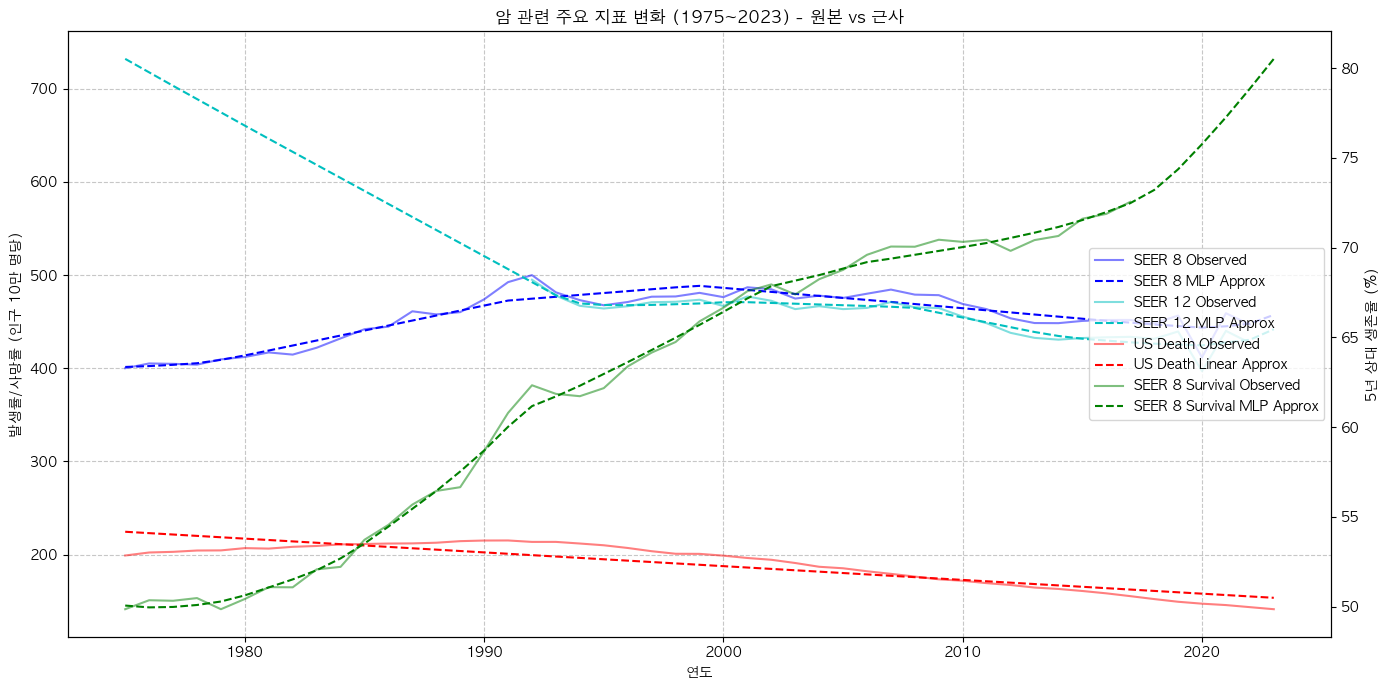

In [44]:
## 시각화: 원본 데이터와 근사값 비교

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 1. 신규 발생률 (SEER 8, SEER 12) - 좌측 y축 (MLP 근사)
# 원본 데이터는 실선, 근사값은 점선으로 표시
ax1.plot(df['Year'], df['SEER8_Observed'], 'b-', label='SEER 8 Observed', alpha=0.5)
ax1.plot(df['Year'], df['SEER8_Observed_Approximation'], 'b--', label='SEER 8 MLP Approx')
ax1.plot(df['Year'], df['SEER12_Observed'], 'c-', label='SEER 12 Observed', alpha=0.5)
ax1.plot(df['Year'], df['SEER12_Observed_Approximation'], 'c--', label='SEER 12 MLP Approx')

# 미국 사망률 (US_Death_Observed) - 좌측 y축 (선형 회귀 근사)
# 원본 데이터는 실선, 근사값은 점선으로 표시
ax1.plot(df['Year'], df['US_Death_Observed'], 'r-', label='US Death Observed', alpha=0.5)
ax1.plot(df['Year'], df['US_Death_Approximation'], 'r--', label='US Death Linear Approx')


ax1.set_xlabel('연도')
ax1.set_ylabel('발생률/사망률 (인구 10만 명당)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title('암 관련 주요 지표 변화 (1975~2023) - 원본 vs 근사')

# 5년 상대 생존율 - 우측 y축 (MLP 근사)
# 원본 데이터는 실선, 근사값은 점선으로 표시
ax2 = ax1.twinx()


ax2.plot(df['Year'], df['SEER8_Survival_Observed'], 'g-', label='SEER 8 Survival Observed', alpha=0.5)
ax2.plot(df['Year'], df['SEER8_Survival_Observed_Approximation'], 'g--', label='SEER 8 Survival MLP Approx')
ax2.set_ylabel('5년 상대 생존율 (%)')

# 범례 설정
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.tight_layout()
plt.show()